### 사전준비

In [1]:
# 기본 패키지 import
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 설정/차트 마이너스 깨짐현상 해결 / seaborn 화면설정
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [3]:
# 머신러닝 패키지 import
import statsmodels.api as sm # 안쓸껄??
import sklearn as sk

In [4]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

### 합성곱 신경망 이미지 분류

#### 패션 MNIST 데이터 로드

In [5]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.datasets.fashion_mnist import load_data

(train_input, train_target), (test_input, test_target) = load_data()

In [6]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

#### 합성곱 신경망 만들기

In [7]:
model = keras.Sequential()

In [8]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                              padding='same', input_shape=(28,28,1)))

In [9]:
model.add(keras.layers.MaxPooling2D(2))

In [10]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', 
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [11]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [13]:
# pydot 설치
!pip install pydot

#### graphviz 설치
https://graphviz.org/download/

In [14]:
!pip install graphviz

In [16]:
!pip install pygraphviz

     -------------------------------------- 119.9/119.9 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pygraphviz
Failed to build pygraphviz
  Running setup.py install for pygraphviz: started
  Running setup.py install for pygraphviz: finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [48 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-3.10
      creating build\lib.win-amd64-3.10\pygraphviz
      copying pygraphviz\agraph.py -> build\lib.win-amd64-3.10\pygraphviz
      copying pygraphviz\graphviz.py -> build\lib.win-amd64-3.10\pygraphviz
      copying pygraphviz\scraper.py -> build\lib.win-amd64-3.10\pygraphviz
      copying pygraphviz\testing.py -> build\lib.win-amd64-3.10\pygraphviz
      copying pygraphviz\__init__.py -> build\lib.win-amd64-3.10\pygraphviz
      creating build\lib.win-amd64-3.10\pygraphviz\tests
      copying pygraphviz\tests\test_attribute_defaults.py -> build\lib.win-amd64-3.10\pygraphviz\tests
      copying pygraphviz\tests\test_clear.py -> build\lib.win-amd64-3.10\pygraphviz\tests
      copying pygraphviz\tests\test_close.py -> bu

In [17]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [18]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


#### 모델 컴파일과 훈련

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 33s 21ms/step - loss: 0.5414 - accuracy: 0.8067 - val_loss: 0.3367 - val_accuracy: 0.8747
Epoch 2/20
1500/1500 [==============================] - 31s 21ms/step - loss: 0.3582 - accuracy: 0.8715 - val_loss: 0.2804 - val_accuracy: 0.8966
Epoch 3/20
1500/1500 [==============================] - 31s 20ms/step - loss: 0.3071 - accuracy: 0.8883 - val_loss: 0.2644 - val_accuracy: 0.9015
Epoch 4/20
1500/1500 [==============================] - 30s 20ms/step - loss: 0.2738 - accuracy: 0.8999 - val_loss: 0.2348 - val_accuracy: 0.9124
Epoch 5/20
1500/1500 [==============================] - 30s 20ms/step - loss: 0.2463 - accuracy: 0.9092 - val_loss: 0.2537 - val_accuracy: 0.9081
Epoch 6/20
1500/1500 [==============================] - 32s 22ms/step - loss: 0.2283 - accuracy: 0.9165 - val_loss: 0.2204 - val_accuracy: 0.9173
Epoch 7/20
1500/1500 [==============================] - 32s 21ms/step - loss: 0.2108 - accuracy: 0.9216 - val_loss: 0.2204 -

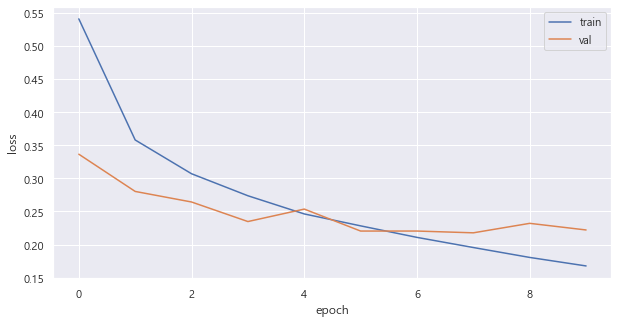

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [21]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 6ms/step - loss: 0.2177 - accuracy: 0.9233


[0.2177468091249466, 0.9233333468437195]

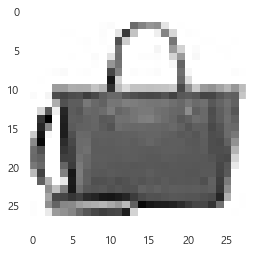

In [23]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.grid()
plt.show()

In [24]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 89ms/step
[[1.2329900e-15 7.7114482e-29 3.5148003e-19 2.5869185e-20 1.3277272e-18
  2.2887475e-19 7.9449943e-19 4.8462211e-19 1.0000000e+00 3.1269748e-19]]


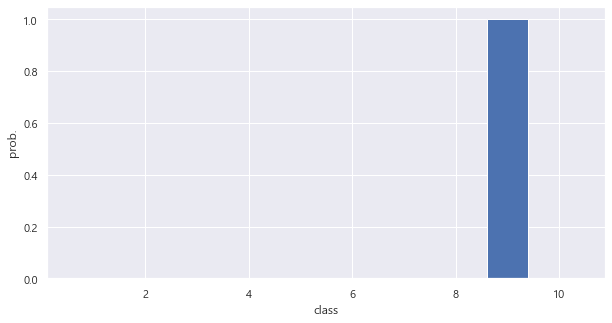

In [25]:
plt.figure(figsize=(10,5))
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [26]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [27]:
print(classes[np.argmax(preds)])

가방


In [28]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [29]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 6ms/step - loss: 0.2413 - accuracy: 0.9147


[0.24127495288848877, 0.9146999716758728]